## crop and fertilizer system

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score


In [21]:
crop = pd.read_csv("Dataset/Crop_recommendation.csv")

In [23]:
crop.head(4)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice


In [24]:
crop.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [25]:
crop.shape

(2200, 8)

In [26]:
crop.describe

<bound method NDFrame.describe of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

In [27]:
crop.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [28]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [29]:
crop.duplicated().sum()

np.int64(0)

In [30]:
crop.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [32]:
crop["label"].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

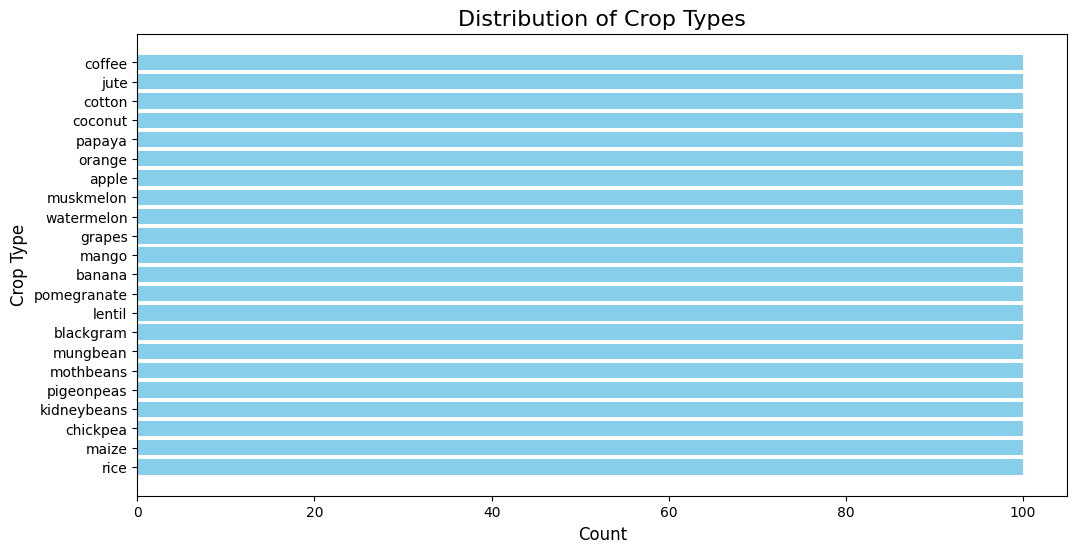

In [37]:
crop_counts = crop['label'].value_counts()
plt.figure(figsize=(12, 6))
plt.barh(crop_counts.index, crop_counts.values, color='skyblue')
plt.title("Distribution of Crop Types", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Crop Type", fontsize=12)
plt.show()

In [39]:
nutrients = crop.groupby('label')[['N', 'P', 'K']].mean()
x = np.arange(len(nutrients.index))
width = 0.25

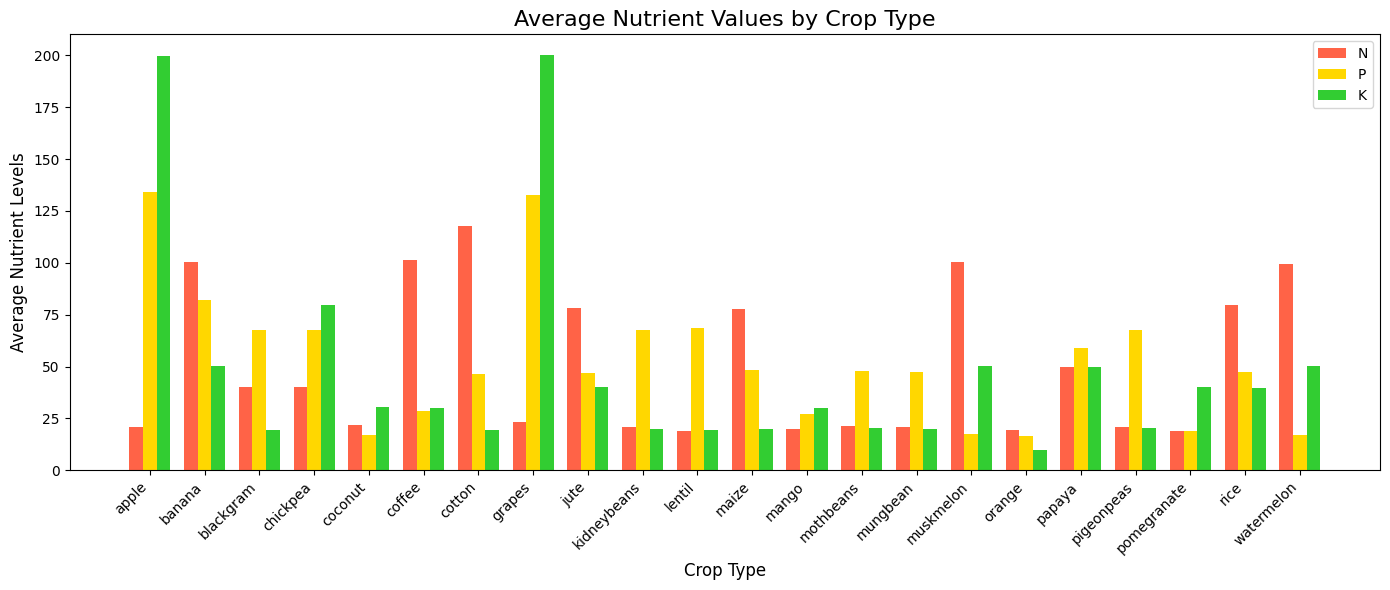

In [40]:

plt.figure(figsize=(14, 6))
plt.bar(x - width, nutrients['N'], width, label='N', color='tomato')
plt.bar(x, nutrients['P'], width, label='P', color='gold')
plt.bar(x + width, nutrients['K'], width, label='K', color='limegreen')
plt.title("Average Nutrient Values by Crop Type", fontsize=16)
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Average Nutrient Levels", fontsize=12)
plt.xticks(x, nutrients.index, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

In [42]:
env_factors = crop.groupby('label')[['temperature', 'humidity', 'ph', 'rainfall']].mean()
x = np.arange(len(env_factors.index))
width = 0.2

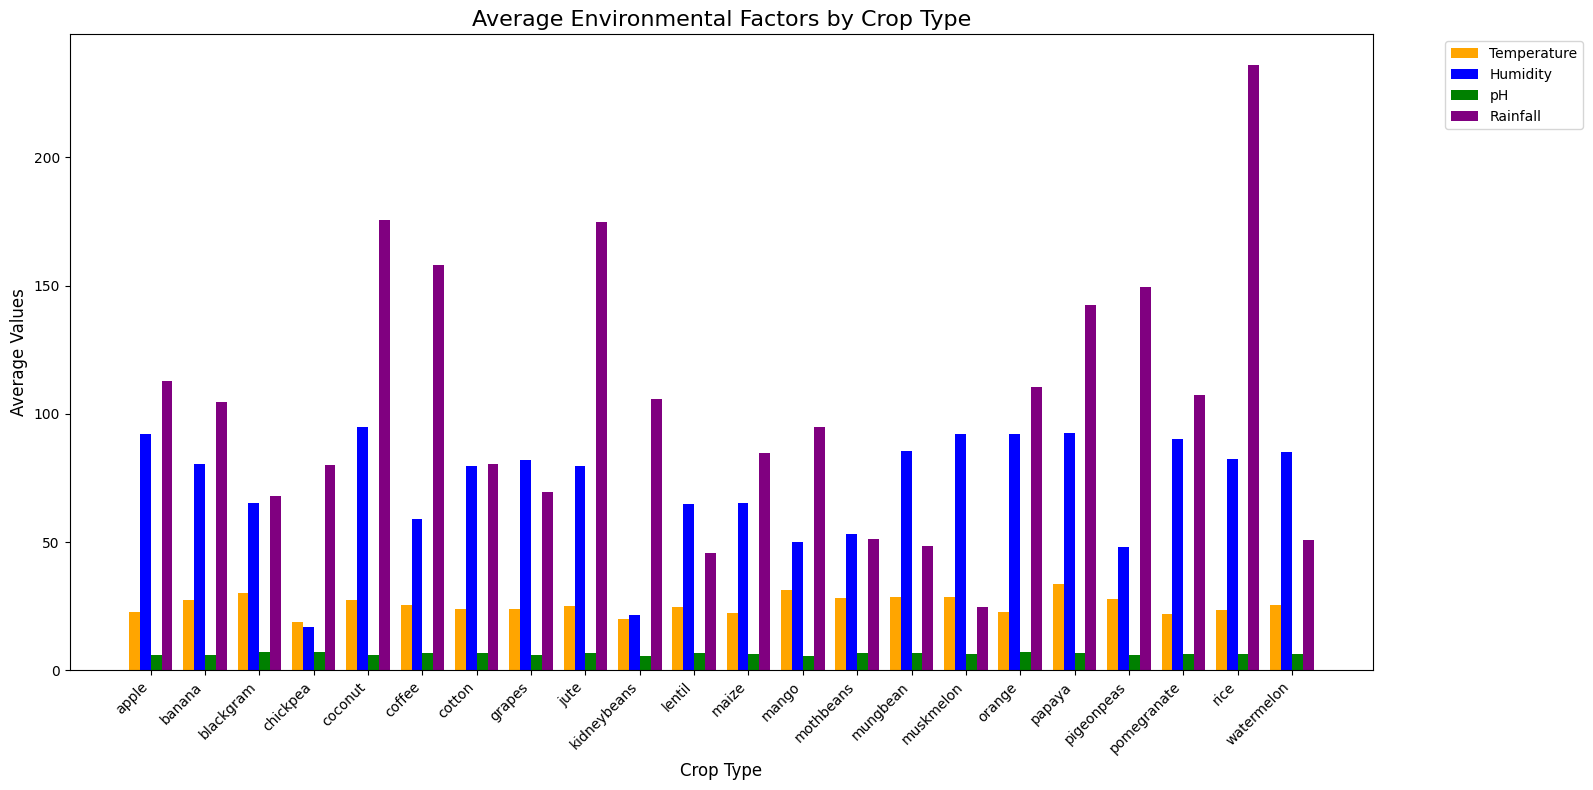

In [43]:
plt.figure(figsize=(16, 8))
plt.bar(x - width*1.5, env_factors['temperature'], width, label='Temperature', color='orange')
plt.bar(x - width/2, env_factors['humidity'], width, label='Humidity', color='blue')
plt.bar(x + width/2, env_factors['ph'], width, label='pH', color='green')
plt.bar(x + width*1.5, env_factors['rainfall'], width, label='Rainfall', color='purple')
plt.title("Average Environmental Factors by Crop Type", fontsize=16)
plt.xlabel("Crop Type", fontsize=12)
plt.ylabel("Average Values", fontsize=12)
plt.xticks(x, env_factors.index, rotation=45, ha='right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()